In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import sys


sys.path.insert(1, '/Users/michaelreitman/github/REprofile/scripts') #points to scripts folder
from downloadhomologfastas import downloadhomologfastas 
import arrangeoutputfastas as aof
import fcrl
from analyzecountedAAs import analyzecountedAAs
import plotrepeats as pr



In [19]:
#get date for appending to filenames 
today = datetime.today().strftime('%Y%m%d') 

In [ ]:
#download blast hits 
blast_filepath = "../results/dREhomologs_MR20230710.csv" #points to csv of all homologs that contains a column with the header "gene"
downloadhomologfastas(blast_filepath,overwrite=False)

In [ ]:
#arrange results
results_folder = "../results/hit_DNA_sequences"
aof.arrangefastas(results_folder)

In [ ]:
## Amino Acid counting

#count blast refseq amino acid repeats and save
results_folder = "../results/hit_DNA_sequences"
output_folder = os.path.join("../",results_folder.split("/")[1], "countedAAs_BLAST_refseq")
if not os.path.isdir(output_folder): 
    os.mkdir(output_folder)

fcrl.fcrlwrapper(results_folder, output_folder,MRget=True)

#count BLAST Genbank amino acid repeats and save
results_folder = "../results/BLAST_Genbankfastas_fromEW_20230713"
output_folder = os.path.join("../",results_folder.split("/")[1], "countedAAs","BLAST_genbank")
if not os.path.isdir(output_folder): 
    os.mkdir(output_folder)

fcrl.fcrlwrapper(results_folder, output_folder)

#count structural similarity amino acid repeats and save
results_folder = "../results/Foldseek_aa_fasta_fromEW_20230712"
output_folder = os.path.join("../",results_folder.split("/")[1], "countedAAs" "structural_similarity")
if not os.path.isdir(output_folder): 
    os.mkdir(output_folder)

fcrl.fcrlwrapper(results_folder, output_folder)

In [ ]:
#combine the Refseq and Genbank counts
refseq_folder = "../results/countedAAs/BLAST_refseq"
genbank_folder = "../results/countedAAs/BLAST_genbank"
output_folder = "../results/countedAAs/total"
databases = ["refseq","genbank"]

if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

fcrl.combinecounts(refseq_folder,genbank_folder,output_folder,databases)

#combine the MR's BLAST counts with structural similarity counts
results_folder = "../results/countedAAs/total"
foldseek_folder = "../results/countedAA/structural_similarity"
output_folder = "../results/countedAAs/total"
databases = ["BLAST","structural similarity"]

if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

fcrl.combinecounts(results_folder,foldseek_folder,output_folder,databases)

In [20]:
#combine MR BLAST homology results with structural similarity results
ss_file_path = "../results/homology_results/dREstuct_similarity_fromEW_20230717.tsv"
blast_file_path = "../results/homology_results/dREhomologs_MR20230718.csv"
output_folder = "../results/homology_results"
homolog_df = pd.read_table(ss_file_path)
blast_df = pd.read_csv(blast_file_path)

homolog_df.rename(columns={
    "protid":"Accession",
    "organism.scientificName":"Scientific Name",
    "organism.commonName":"Common Name",
    "sequence.length":"Acc. Len",
    "organism.taxonId":"Taxid",
    },inplace=True)

#remove hits that came from blast because we blasted seperately as well
homolog_df = homolog_df[homolog_df["source.method"].str.contains('foldseek')]
homolog_df["source.method"]='foldseek'

homolog_df["gene"] = homolog_df["reference"].str.split('_').str[0]
homolog_df.drop_duplicates(inplace=True)
homolog_df.drop_duplicates(subset = ["Accession"],inplace=True)
homolog_df.reset_index(inplace=True,drop=True)
#only keep results with TM score >0.2
homolog_df = homolog_df[homolog_df["TM_v_query"]>0.2]

full_df = pd.concat([blast_df ,homolog_df], axis=0, ignore_index=True)
full_df.to_csv(os.path.join(output_folder,"full_results_" + today + ".csv"))

In [28]:
#analyze the BLAST amino acid repeats and save the results in a new folder
countedAAs_folder = "../results/counted_AAs/total"
output_path =  "../results/analyzed_AAcounts"
homology_file_path = "../results/homology_results/full_results_20230802.csv"

analyzecountedAAs(input_dir = countedAAs_folder, 
output_path = output_path, 
homology_file_path=homology_file_path 
)

/Users/michaelreitman/github/REprofile/scripts/analyzecountedAAs.py:78: DtypeWarning: Columns (16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  homolog_df = pd.read_csv(homology_file_path)
/Users/michaelreitman/github/REprofile/scripts/analyzecountedAAs.py:78: DtypeWarning: Columns (16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  homolog_df = pd.read_csv(homology_file_path)
/Users/michaelreitman/github/REprofile/scripts/analyzecountedAAs.py:78: DtypeWarning: Columns (16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  homolog_df = pd.read_csv(homology_file_path)
/Users/michaelreitman/github/REprofile/scripts/analyzecountedAAs.py:78: DtypeWarning: Columns (16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  homolog_df = pd.read_csv(homology_file_path)
/Users/michaelreitman/github/REprofile/scripts/analyzecountedAAs.py:78: DtypeWarning

In [29]:
#plot the amino acid results for each dRE
folder = "../results/analyzed_AAcounts"
pr.plot_analyzed_AAcounts(folder)

/Users/michaelreitman/github/REprofile/scripts/plotrepeats.py:16: DtypeWarning: Columns (14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  combo_df = pd.read_csv(os.path.join(input_folder,"repeatswithhomology.csv"))
/Users/michaelreitman/github/REprofile/scripts/plotrepeats.py:16: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  combo_df = pd.read_csv(os.path.join(input_folder,"repeatswithhomology.csv"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/michaelreitman/github/REprofile/scripts/plotrepeats.py:16: DtypeWarning: Columns (14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  combo_df = pd.read_csv(os.path.join(input_folder,"repeatswithhomology.csv"))
/Users/michaelreitman/github/REprofile/scripts/plotrepeats.py:16: DtypeWarning: Colum

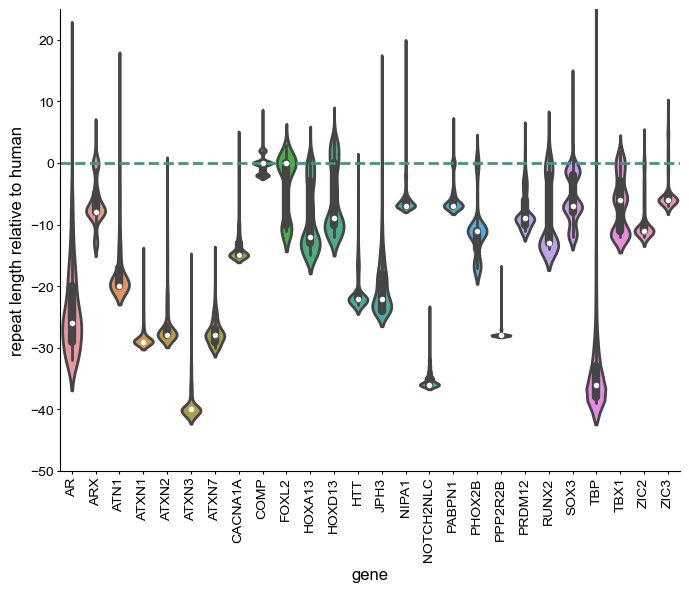

In [30]:
# plot all coding dREs together 
all_AA_reps_path = "../results/analyzed_AAcounts/all_pathologic_AA_repeats.csv"
all_AA_reps = pd.read_csv(all_AA_reps_path)
comparison_metric = "Human Normal Max Delta"

#only one gene per organism
all_AA_reps = all_AA_reps.sort_values('Length', ascending=False).drop_duplicates(subset = ['gene','Scientific Name']).sort_index()
pr.plot_allDRE_pathologicalAA(all_AA_reps,comparison_metric)
plt.ylim([-50,25])

output_folder = "../results/analyzed_AAcounts"


plt.savefig(os.path.join(output_folder,'codingdREs_relmaxhumanrepeats_'+today+'.png'), format='png', dpi=1200)
plt.savefig(os.path.join(output_folder,'codingdREs_relmaxhumanrepeats_'+today+'.pdf'), format='pdf', dpi=1200)

Taxid     Common Name               
42254.0   European shrew                13
10041.0   white-footed mouse            13
105255.0  banner-tailed kangaroo rat    12
36803.0   cinereus shrew                12
9597.0    pygmy chimpanzee              12
109475.0  white-toothed pygmy shrew     12
60711.0   green monkey                  12
9999.0    Arctic ground squirrel        11
591936.0  Ugandan red Colobus           11
9601.0    Sumatran orangutan            11
Name: count, dtype: int64


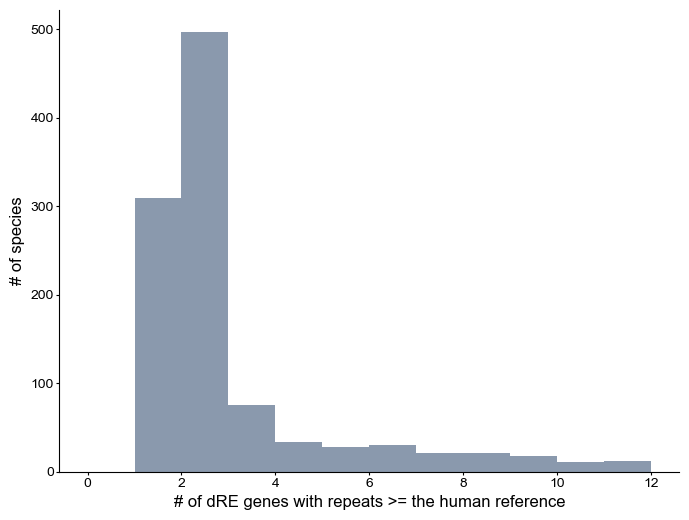

In [31]:
all_hit_species_path = "../results/analyzed_AAcounts/all_hit_species.csv"
all_hit_species = pd.read_csv(all_hit_species_path)

#filter so each species only has one hit per dRE
all_hit_species = all_hit_species.sort_values('Length', ascending=False).drop_duplicates(subset = ['gene','Scientific Name']).sort_index()

dRE_count_by_species= all_hit_species[['Taxid','Common Name']].value_counts()

bins = range(0,dRE_count_by_species.max(),1)
plt.subplots(figsize=(8,6))
plt.hist(dRE_count_by_species,bins=bins,color="arcadia:marineblue")
plt.xlabel('# of dRE genes with repeats >= the human reference')
plt.ylabel('# of species')

print(dRE_count_by_species.iloc[0:10])

In [32]:
filename = "../results/taxidcounts_for_treemapping/taxid_ndREhits_forEW" + today + ".csv"
dRE_count_by_species.to_csv(filename)

In [35]:
temp = all_hit_species.copy()
#For NIPA1 the reference genome contains more repeats than normal max.
# JPH3 assessement is challenging because the repeat happens from an anti-sense transcript
#for HOXD13/ZIC3, many homologs are HOXA13/ZIC2 proteins which have longer repetitive tracts and thus gives false positives
temp = temp[~temp["gene"].str.contains("COMP|ZIC3|HOXD13")]

pathogenicmin_dRE_species = temp[temp["Human Pathogenic Min Delta"] >= 0]
normalmax_dRE_species = temp[temp["Human Normal Max Delta"] > 0]

print(pathogenicmin_dRE_species[['Taxid','Scientific Name','Common Name',"gene","Human Pathogenic Min Delta", "Per. Ident","TM_v_query"]].sort_values("gene"))

          Taxid             Scientific Name                  Common Name  \
18633   29082.0  Macroscelides proboscideus   short-eared elephant shrew   
18634  107270.0    Brachytarsomys albicauda             white-tailed rat   
18631  109478.0             Myotis brandtii                 Brandt's bat   
18632    9662.0                 Meles meles              Eurasian badger   
18868   33562.0        Dromiciops gliroides             monito del monte   
18867    9315.0        Notamacropus eugenii               tammar wallaby   
18865   38775.0         Antechinus flavipes     yellow-footed antechinus   
18864    9337.0       Trichosurus vulpecula             common brushtail   
18863   38626.0      Phascolarctos cinereus                        koala   
18861   29139.0            Vombatus ursinus                common wombat   
18856   13616.0       Monodelphis domestica    gray short-tailed opossum   
18855  191870.0         Gracilinanus agilis  Agile Gracile Mouse Opossum   
18869    930

In [34]:
healthy_human_max = normalmax_dRE_species[['Taxid','Common Name']].value_counts()
print(healthy_human_max.iloc[0:10])

filename = "../results/taxidcounts_for_treemapping/taxid_exceeds_healthy_human_max_forEW" + today + ".csv"
healthy_human_max.to_csv(filename)

Taxid     Common Name              
9261.0    Australian echidna           5
9305.0    Tasmanian devil              4
38626.0   koala                        4
9337.0    common brushtail             4
38775.0   yellow-footed antechinus     4
33562.0   monito del monte             4
214514.0  Pacific pocket mouse         3
9662.0    Eurasian badger              3
59472.0   Kuhl's pipistrelle           3
13616.0   gray short-tailed opossum    3
Name: count, dtype: int64


In [ ]:
mean_lengthZscore = normalmax_dRE_species[["Taxid","Length Zscore"]].groupby("Taxid").mean().sort_values("Length Zscore", ascending=False)
summed_lengthZscore = normalmax_dRE_species[["Taxid","Length Zscore"]].groupby("Taxid").sum().sort_values("Length Zscore", ascending=False)

print(summed_lengthZscore.iloc[0:25])

filename = "../results/taxidcounts_for_treemapping/taxid_exceeds_healthy_max_summed_length_zscore_forEW" + today + ".csv"
summed_lengthZscore.to_csv(filename)

filename = "../results/taxidcounts_for_treemapping/taxid_exceeds_healthy_max_mean_length_zscore_forEW" + today + ".csv"
mean_lengthZscore.to_csv(filename)